Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [3]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [4]:
X_mean = np.array(zp).mean()
print(X_mean)
Y_mean = np.array(ks).mean()
print(Y_mean)

101.4
709.9


In [5]:
X_sq_mean = np.array(zp)**2
X_sq_mean = X_sq_mean.mean()
print(X_sq_mean)

13776.6


In [6]:
Y_X_mean = np.array(zp)*np.array(ks)
Y_X_mean = Y_X_mean.mean()
print(Y_X_mean)

81141.7


In [7]:
b = round((Y_X_mean - X_mean*Y_mean)/(X_sq_mean - X_mean**2), 2)
print(b)

2.62


In [8]:
a = round(Y_mean - b*X_mean, 2)
print(a)

444.23


Получаем, что уравнение линейной регрессии имеет следующий вид: y = 444.23 + 2.62*x

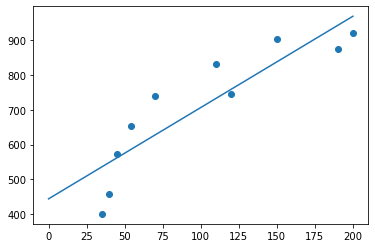

In [9]:
plt.scatter(zp, ks)
x = np.linspace(0, 200)
func = lambda x: 444.23 + 2.62*x
y = [func(item) for item in x]
plt.plot(x, y)
plt.show()

Решение той же задачи, но матричным методом


In [10]:
X = np.array(zp)
Y = np.array(ks)
X = X.reshape((10, 1))
Y = Y.reshape((10, 1))

In [11]:
X = np.hstack([np.ones((10,1)), X])

In [12]:
beta = np.dot(np.linalg.inv(X.T.dot(X)), np.dot(X.T, Y))

In [13]:
print(f'Получаем, что уравнение линейной регрессии имеет следующий вид: y = {beta[0][0]} + {beta[1][0]}*x')

Получаем, что уравнение линейной регрессии имеет следующий вид: y = 444.17735732435904 + 2.620538882402766*x


Матричный метод без intercept

In [14]:
X = np.array(zp)
Y = np.array(ks)
X = X.reshape((10, 1))
Y = Y.reshape((10, 1))
beta_without_intercept = np.dot(np.linalg.inv(X.T.dot(X)), np.dot(X.T, Y))

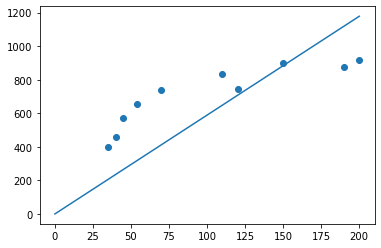

In [15]:
plt.scatter(zp, ks)
plt.plot(x, beta_without_intercept[0][0]*x)
plt.show()

In [16]:
print(beta_without_intercept[0][0])

5.889820420132688


Градиентный спуск без intercept

In [64]:
X = np.array(zp)
Y = np.array(ks)
def MSE (X, Y, beta):
    n = len(X)
    return 1/n*np.sum((beta*X - Y)**2)
def dMSE (X, Y, beta):
    n = len(X)
    return 2/n*np.sum((beta*X - Y)*X)
lr = 0.000001
n = 1000
beta = 1
eps = 0.1
for i in range(n):
    MSE_0 = MSE(X, Y, beta)
    beta -= lr*dMSE(X, Y, beta)
    MSE_1 = MSE(X, Y, beta)
    if abs(MSE_0 - MSE_1) < eps: 
        break
print(beta)

5.87875294522654


Градиентный спуск с intercept

2.6221548293764307 443.95781250029677


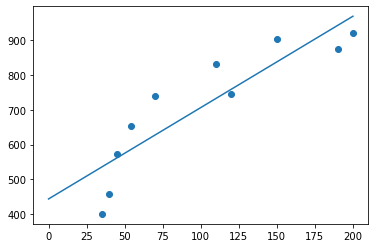

In [65]:
X = np.array(zp)
Y = np.array(ks)
def MSE (X, Y, a, b):
    n = len(X)
    return 1/n*np.sum((a + b*X - Y)**2)

def dMSE_a (X, Y, a, b):
    n = len(X)
    return np.sum(-X * (Y - (a * X + b))) / n

def dMSE_b (X, Y, a, b):
    n = len(X)
    return np.sum(-(Y - (a * X + b))) / n


lr1 = 0.0001
lr2 = 0.0001
n = 300000
a = 1
b = 1

for i in range(n):
    a -= lr1*dMSE_a(X, Y, a, b)
    b -= lr2*dMSE_b(X, Y, a, b)

print(a, b)

plt.scatter(zp, ks)
plt.plot(x, b + a*x)
plt.show()